# ARMA Models - Lab

## Introduction

In this lab, you'll practice your knowledge the Autoregressive (AR), the Moving Average (MA) model, and the combined ARMA model.

## Objectives

You will be able to:
- Understand and explain what a Autoregressive model is
- Understand and explain what a Moving Average model is
- Understand and apply the mathematical formulations for Autoregressive and Moving Average models
- Understand how AR and MA can be combined in ARMA models

## Generate an AR model of the first order with $\phi = 0.7$

In [1]:
#import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Recall that the AR model has the following formula:

$$Y_t = \mu + \phi * Y_{t-1}+\epsilon_t$$

This means that:

$$Y_1 = \mu + \phi * Y_{0}+\epsilon_1$$
$$Y_2 = \mu + \phi * (\text{mean-centered version of } Y_1) +\epsilon_2$$

and so on. 

Assume a mean-zero white noise with a standard deviation of 2. Make sure you have a daily datetime index ranging from January 2017 until the end of March 2018. Assume that $\mu=5$ and $Y_0= 8$.


In [2]:
# keep the random seed
np.random.seed(11225)

# create a series with the specified dates
dates=pd.date_range('2017-01-01','2018-03-31')

In [4]:
# store the parameters
mu=5
y0=8
phi=0.7
e_mean=0
e_std=2

In [63]:
# generate the time series according to the formula
ys=[0]*len(dates)

for i in range(0,len(dates)):
    t=(mu+(0.7*y0)+np.random.normal(loc=e_mean,scale=e_std,size=1))
    ys[i]=t[0]#fudging - calculation provides array of length 1 that breaks acf & pacf functions - this takes the value 
    y0=ys[i]-mu # mean centering of previous term


Plot the time series and verify what you see

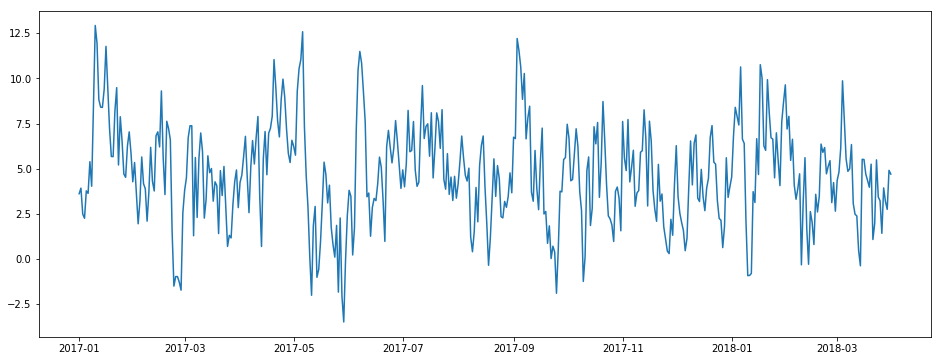

In [64]:
model=pd.Series(ys,index=dates)
plt.figure(figsize=(16,6))
plt.plot(model)

In [66]:
model.head()

2017-01-01    3.604910
2017-01-02    3.913478
2017-01-03    2.477089
2017-01-04    2.241641
2017-01-05    3.761666
Freq: D, dtype: float64

given solution below different numbers bust mostly similar, same range and stuff

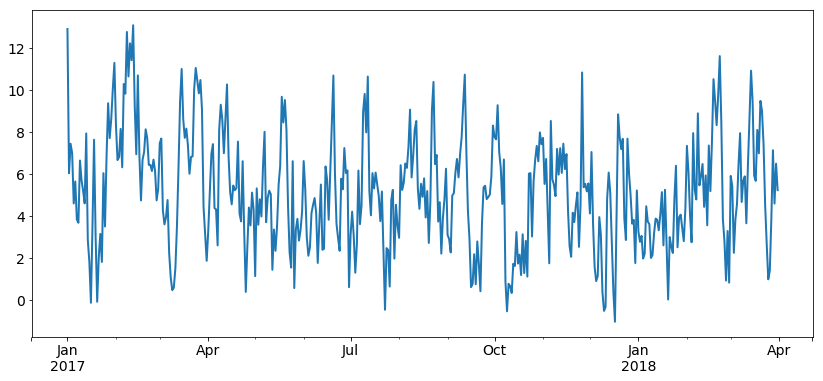

In [23]:
error = np.random.normal(0,2,len(dates))
Y_0 = 8
mu = 5
phi = 0.7
TS = [None] * len(dates)
y = Y_0
for i, row in enumerate(dates):
    TS[i] = mu + y * phi + error[i]
    y = TS[i] - mu
series =  pd.Series(TS, index=dates)

series.plot(figsize=(14,6), linewidth=2, fontsize=14);

In [55]:
series.head()

2017-01-01    12.889035
2017-01-02     6.040212
2017-01-03     7.440093
2017-01-04     6.995732
2017-01-05     4.604750
Freq: D, dtype: float64

## Look at the ACF and PACF of your model and write down your conclusions

We recommend to use `plot_acf` in statsmodels instead of the pandas ACF variant.

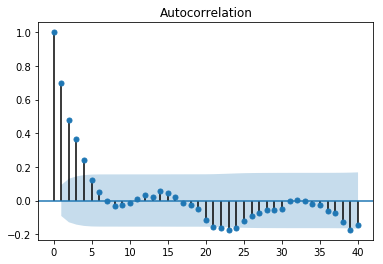

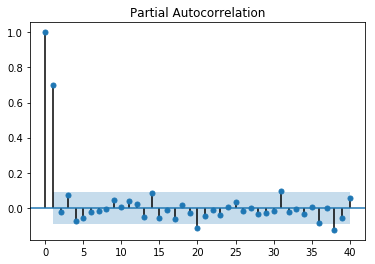

In [68]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(model,lags=40);
plot_pacf(model,lags=40);

## Check your model with ARMA in statsmodels

Statsmodels also has a tool that fits ARMA models on time series. The only thing you have to do is provide the number of orders for AR vs MA. Have a look at the code below, and the output of the code. Make sure that the output for the $\phi$ parameter and $\mu$ is as you'd expect!

In [69]:
# assuming your time series are stored in an object "series"
# Import the ARMA module from statsmodels
from statsmodels.tsa.arima_model import ARMA
import statsmodels.api as sm

# Fit an MA(1) model to the first simulated data
mod_arma = ARMA(model, order=(1,0))
res_arma = mod_arma.fit()

# Print out summary information on the fit
print(res_arma.summary())

# Print out the estimate for the constant and for theta
print(res_arma.params)

C:\Users\kosta\Anaconda3\envs\learn-env\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Users\kosta\Anaconda3\envs\learn-env\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
C:\Users\kosta\Anaconda3\envs\learn-env\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In t

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  455
Model:                     ARMA(1, 0)   Log Likelihood                -961.056
Method:                       css-mle   S.D. of innovations              1.999
Date:                Wed, 10 Apr 2019   AIC                           1928.113
Time:                        18:20:40   BIC                           1940.474
Sample:                    01-01-2017   HQIC                          1932.983
                         - 03-31-2018                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6744      0.309     15.111      0.000       4.068       5.281
ar.L1.y        0.6986      0.033     20.930      0.000       0.633       0.764
                                    Roots           

## Generate an MA model of the first order with $\theta = 0.9$

Recall that the MA model has the following formula:

$$Y_t = \mu +\epsilon_t + \theta * \epsilon_{t-1}$$

This means that:

$$Y_1 = \mu + \epsilon_1+  \theta * \epsilon_{0}$$
$$Y_2 = \mu + \epsilon_2+  \theta * \epsilon_{1}$$

and so on. 

Assume a mean-zero white noise with a standard deviation of 4. Make sure you have a daily datetime index is ranging from April 2015 until the end of August 2015. Assume that $\mu=7$.

In [73]:
# keep the random seed
np.random.seed(1234)

# create a series with the specified dates
dates=pd.date_range('2015-04-01','2015-08-31')
# store the parameters
mu=7
theta=0.9

#generate the time series
error=np.random.normal(0,4,len(dates))
TS=np.zeros(len(dates))
error_prev=error[0]
for i in range(len(dates)):
    TS[i]=mu+error[i]+theta*error_prev
    error_prev=error[i]
TS_series=pd.Series(TS,index=dates)
TS_series.head()


2015-04-01    10.582907
2015-04-02     3.933264
2015-04-03     8.443315
2015-04-04    10.907138
2015-04-05     2.992098
Freq: D, dtype: float64

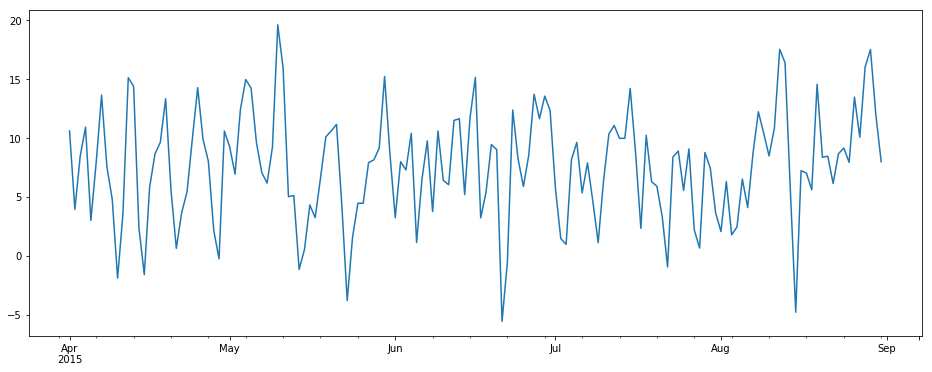

In [75]:
# Plot the time series
TS_series.plot(figsize=(16,6))

## Look at the ACF and PACF of your model and write down your conclusions

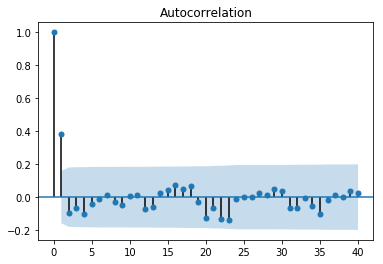

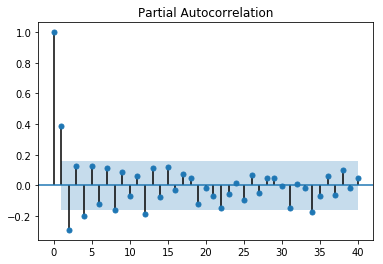

In [79]:
plot_acf(TS_series,lags=40);
plot_pacf(TS_series,lags=40);

## Check your model with ARMA in statsmodels

Repeat what you did for your AR model but now for your MA model to verify the parameters are estimated correctly.

In [82]:
# Fit an AR(1) model to the first simulated data
mod_arma = ARMA(TS_series, order=(0,1))
res_arma = mod_arma.fit()

# Print out summary information on the fit
print(res_arma.summary())

# Print out the estimate for the constant and for theta
print(res_arma.params)

# Print out summary information on the fit


                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  153
Model:                     ARMA(0, 1)   Log Likelihood                -426.378
Method:                       css-mle   S.D. of innovations              3.909
Date:                Wed, 10 Apr 2019   AIC                            858.757
Time:                        19:13:51   BIC                            867.848
Sample:                    04-01-2015   HQIC                           862.450
                         - 08-31-2015                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.5373      0.590     12.776      0.000       6.381       8.694
ma.L1.y        0.8727      0.051     17.165      0.000       0.773       0.972
                                    Roots           

## Create a model for the 400m data set

Import the data set containing the historical running times for the men's 400m on the Olympic games.

In [95]:
# the data is in "winning_400m.csv"
olympics=pd.read_csv('winning_400m.csv')
olympics.head()

,year,winning_times
0,1900,49.4
1,1904,49.2
2,1908,50.0
3,1912,48.2
4,1920,49.6


In [96]:
olympics.year=pd.to_datetime(olympics.year.astype(str))
olympics.set_index('year',inplace=True)
olympics.head()

,winning_times
year,
1900-01-01,49.4
1904-01-01,49.2
1908-01-01,50.0
1912-01-01,48.2
1920-01-01,49.6


Plot the data

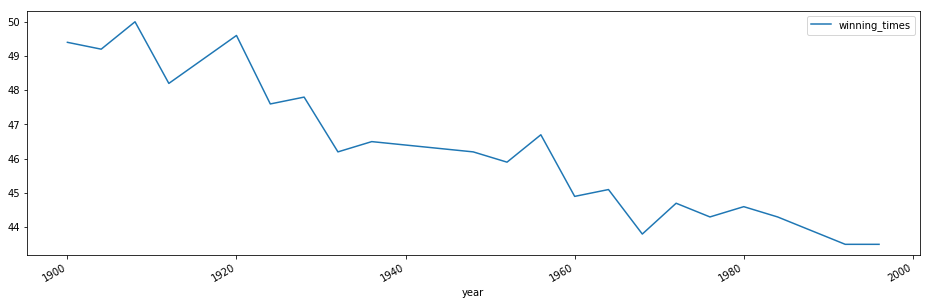

In [98]:
olympics.plot(figsize=(16,5))

Difference the data to get a stationary time series. Make sure to remove the first NaN value.

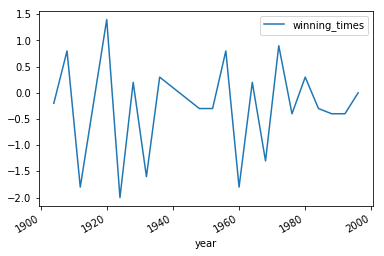

In [101]:
# your code here
oly_diff=olympics.diff(periods=1)
oly_diff.dropna(inplace=True)
oly_diff.plot()

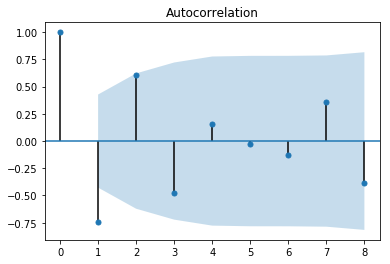

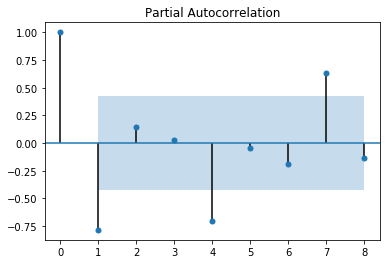

In [104]:
plot_acf(oly_diff,lags=8);
plot_pacf(oly_diff,lags=8);

Based on the ACF and PACF, fit an arma model with the right orders for AR and MA. Feel free to try different models and compare AIC and BIC values, as well as significance values for the parameter estimates.

In [111]:
mod_arma = ARMA(oly_diff, order=(2,1))
res_arma = mod_arma.fit()

# Print out summary information on the fit
print(res_arma.summary())

                              ARMA Model Results                              
Dep. Variable:          winning_times   No. Observations:                   21
Model:                     ARMA(2, 1)   Log Likelihood                 -18.955
Method:                       css-mle   S.D. of innovations              0.562
Date:                Wed, 10 Apr 2019   AIC                             47.911
Time:                        19:29:13   BIC                             53.133
Sample:                             0   HQIC                            49.044
                                                                              
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2916      0.073     -4.018      0.001      -0.434      -0.149
ar.L1.winning_times    -1.6827      0.119    -14.199      0.000      -1.915      -1.450
ar.L2.winning_ti

C:\Users\kosta\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [110]:
mod_arma = ARMA(oly_diff, order=(2,2))
res_arma = mod_arma.fit()

# Print out summary information on the fit
print(res_arma.summary())

C:\Users\kosta\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:          winning_times   No. Observations:                   21
Model:                     ARMA(2, 2)   Log Likelihood                 -16.472
Method:                       css-mle   S.D. of innovations              0.461
Date:                Wed, 10 Apr 2019   AIC                             44.943
Time:                        19:28:49   BIC                             51.210
Sample:                             0   HQIC                            46.303
                                                                              
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2718      0.098     -2.779      0.013      -0.463      -0.080
ar.L1.winning_times    -1.7575      0.097    -18.069      0.000      -1.948      -1.567
ar.L2.winning_ti

In [117]:
mod_arma = ARMA(oly_diff, order=(1,2))
res_arma = mod_arma.fit()

# Print out summary information on the fit
print(res_arma.summary())

                              ARMA Model Results                              
Dep. Variable:          winning_times   No. Observations:                   21
Model:                     ARMA(1, 2)   Log Likelihood                 -19.076
Method:                       css-mle   S.D. of innovations              0.558
Date:                Wed, 10 Apr 2019   AIC                             48.152
Time:                        19:32:07   BIC                             53.374
Sample:                             0   HQIC                            49.285
                                                                              
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2784      0.148     -1.876      0.078      -0.569       0.012
ar.L1.winning_times    -0.4717      0.261     -1.807      0.088      -0.983       0.040
ma.L1.winning_ti

C:\Users\kosta\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


## What is your final model? Why did you pick this model?

either of (2,2) or (2,1) other models with higher order p and q resulted in high p-values for those variables

## Summary

Great! Now that you know the ins and outs of ARMA models and you've practiced your modeling knowledge.